# Data Preparation

For Data Preparation and EDA we are using python then for modelling we will use Spark MLlib

### EDA

Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends. We are using python here.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [2]:
telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [4]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After looking at the above output, we can say that there are 11 missing values for Total Charges. Let us replace remove these 11 rows from our data set

Do the dummies variable to get better insight and understanding.

In [6]:
#Impute missing values with mean
telecom_cust["TotalCharges"].fillna(telecom_cust["TotalCharges"].mean())
#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0           True   
1              0      34           56.95       1889.50      0          False   
2              0       2           53.85        108.15      1          False   
3              0      45           42.30       1840.75      0          False   
4              0       2           70.70        151.65      1           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0        False       False         True           True  ...   
1         True        True        False           True  ...   
2         True        True        False           True  ...   
3         True        True        False           True  ...   
4        False        True        False           True  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                False                     True              False   
1                False                    False               True   
2                False                     True              False   
3                False                    False               True   
4                False                     True              False   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0              False                False                  True   
1              False                 True                 False   
2              False                False                  True   
3              False                 True                 False   
4              False                False                  True   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 46 columns]

**A.)** ***Correlation*** - Find correlation to see the relationship between variable and churn.

In [13]:
plt.figure(figsize=(15,8))
sns.pairplot(df_dummies)

<Figure size 1500x800 with 0 Axes>

By doing pair plot like above we can see the relationship and correlation of each variable in the dataset.

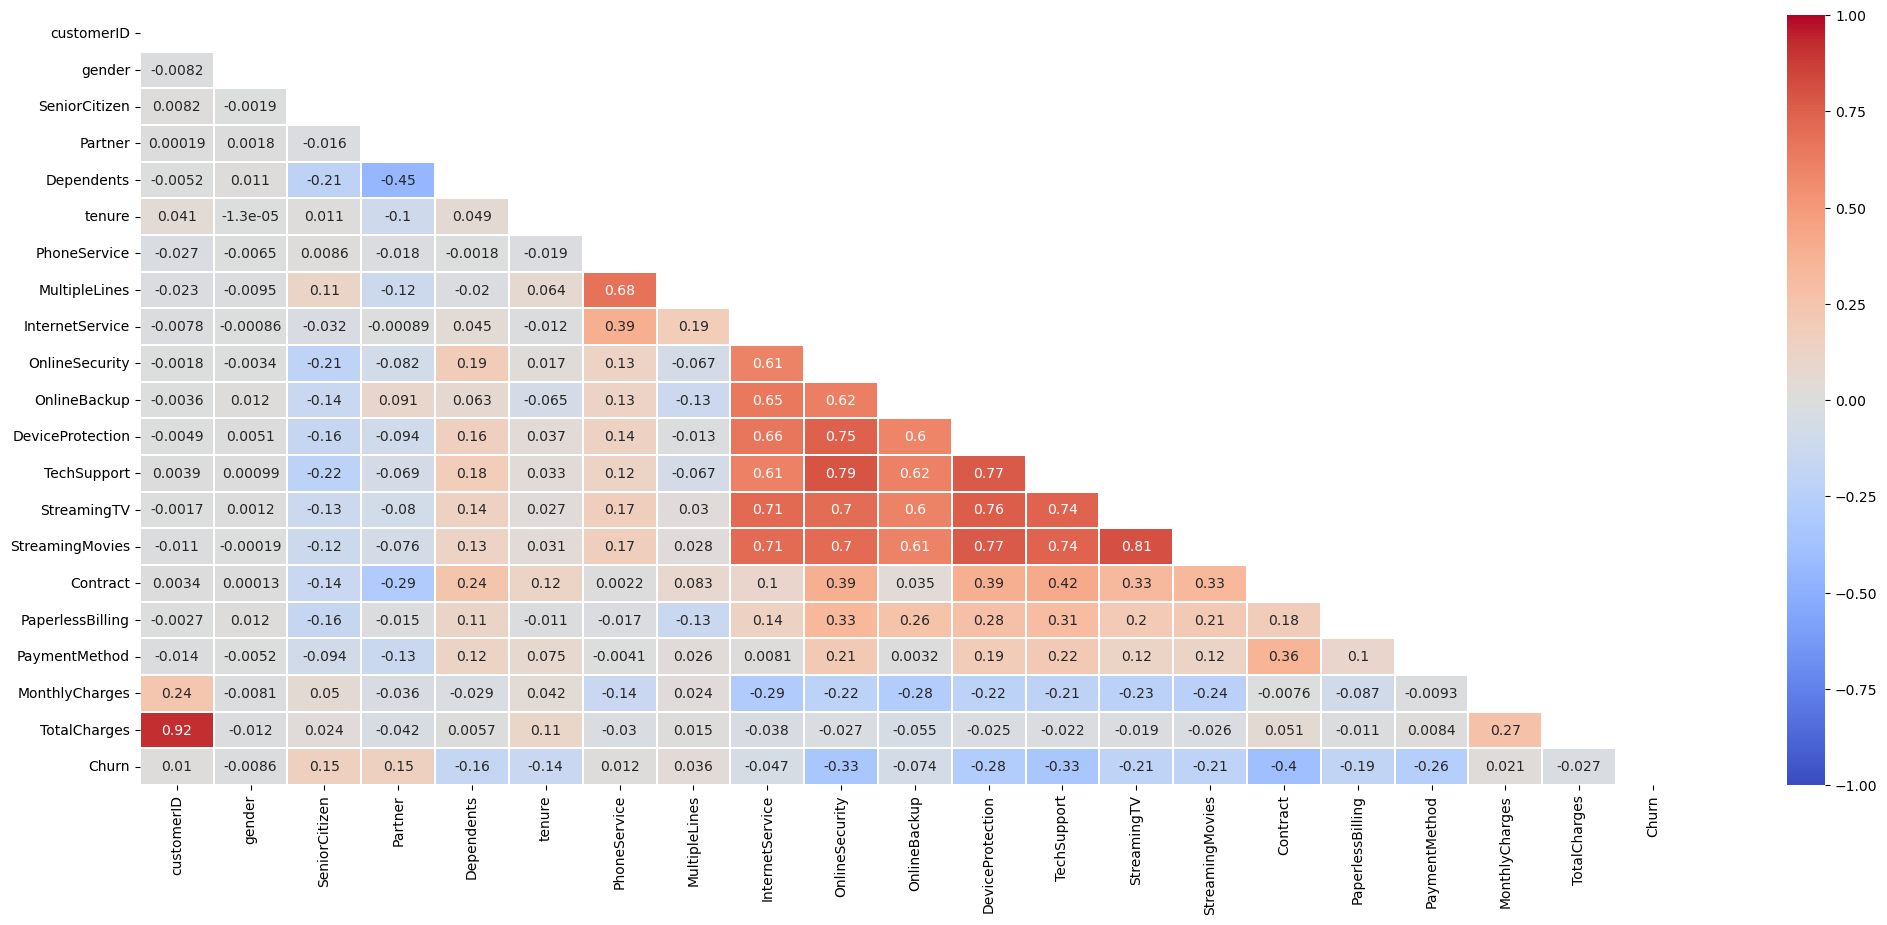

In [7]:
plt.figure(figsize=(25, 10))

corr = telecom_cust.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Here the more clear value for relationship between variable using heatmap. The higher the value, the stronger the relationbship.

<Axes: >

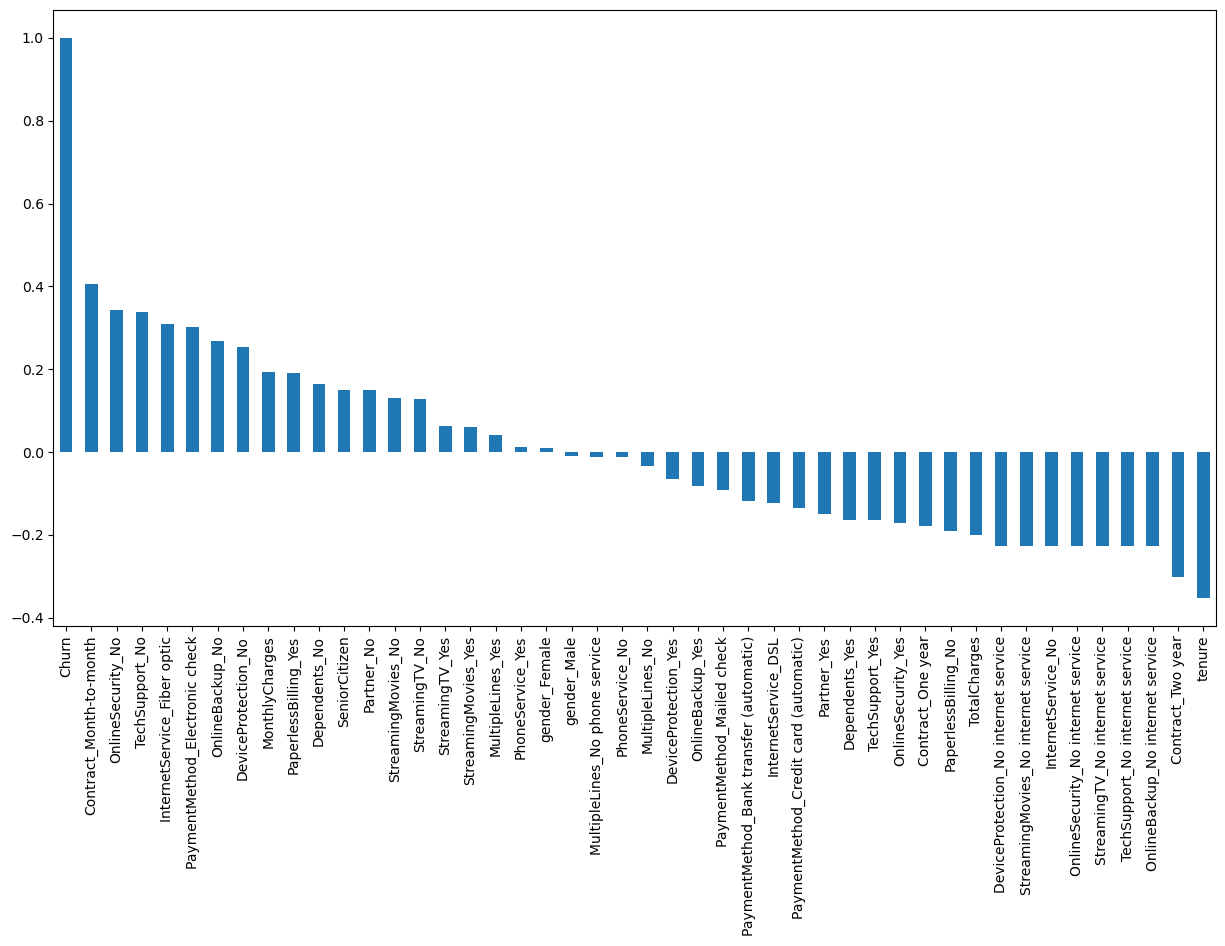

In [8]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Here we are doing correlation for churn with dummies variable to get better insight.

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn. 

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

**B.)** ***Outliers*** - To find the outliers we doing a boxplot. Detect the outliers is necessary especially for the data that sensitive to outliers

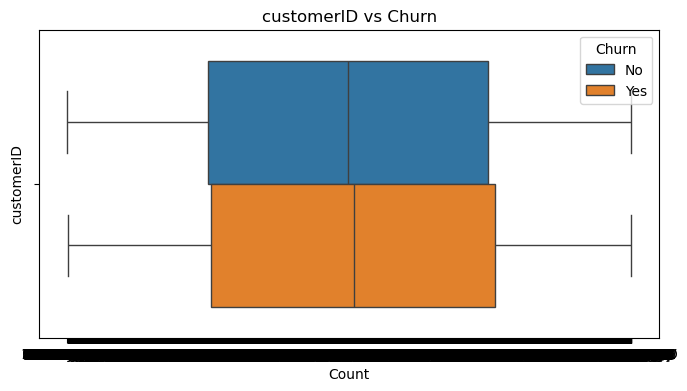

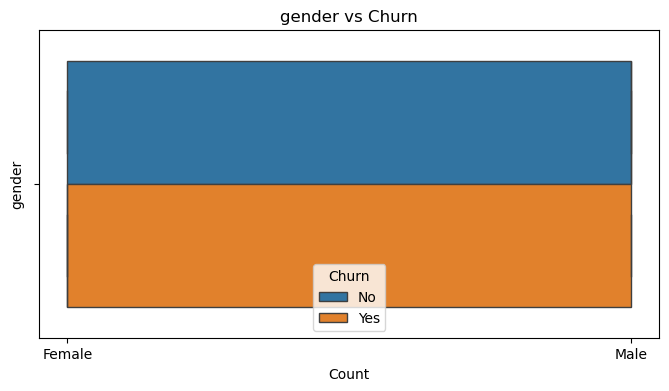

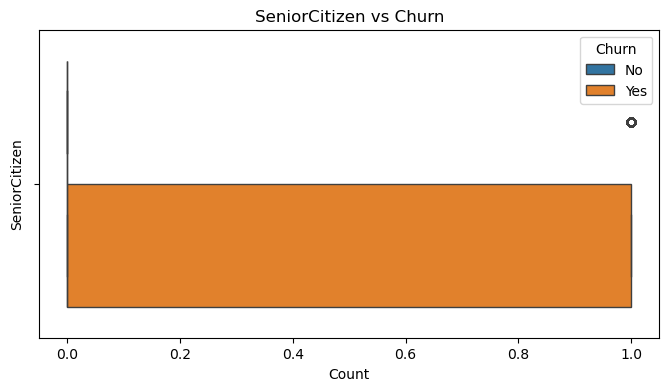

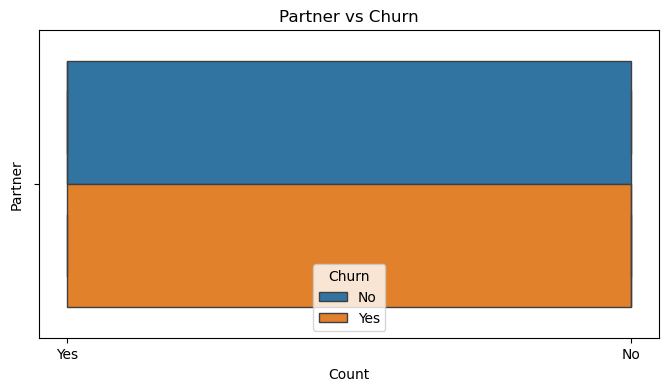

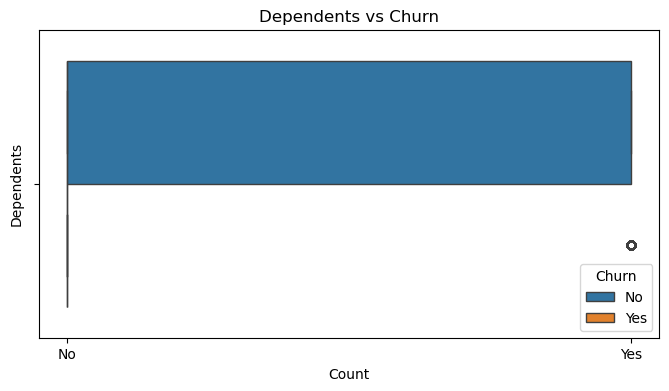

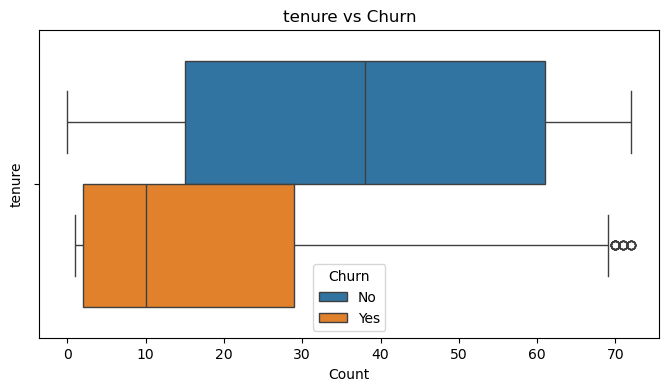

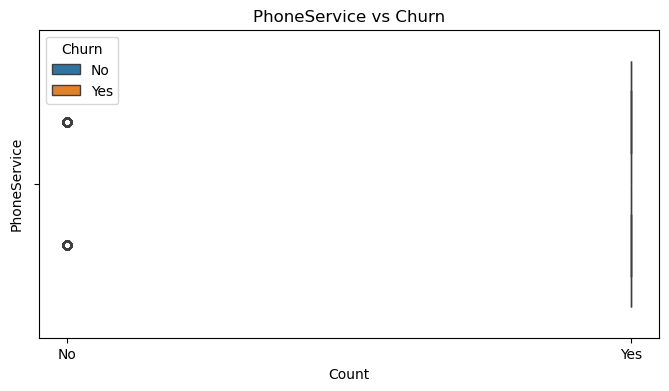

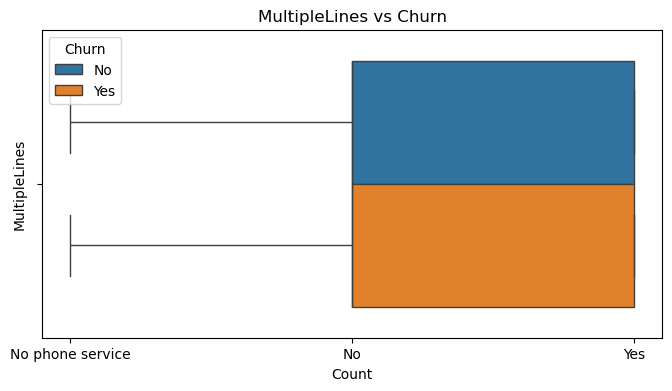

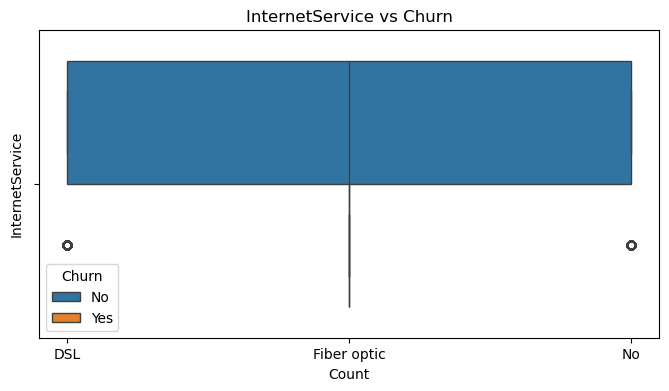

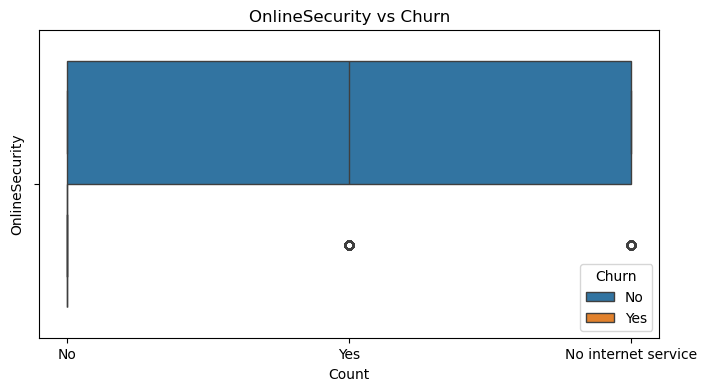

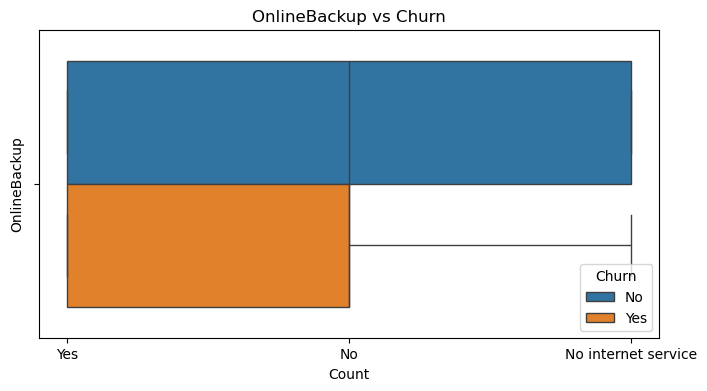

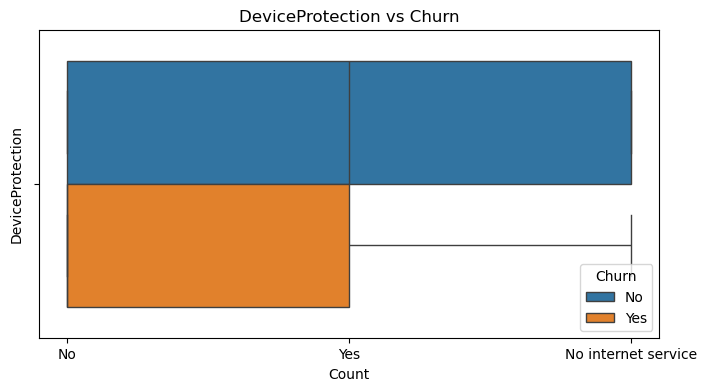

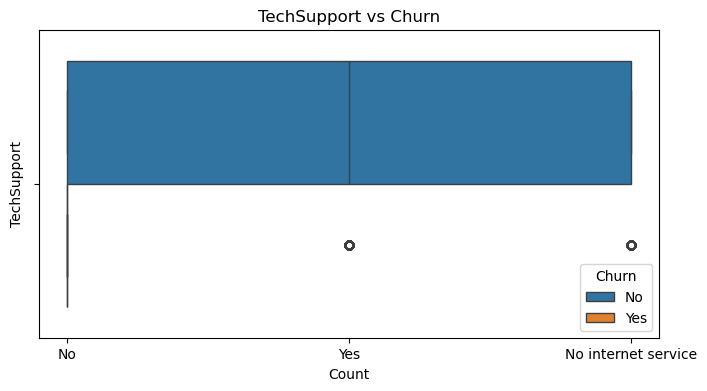

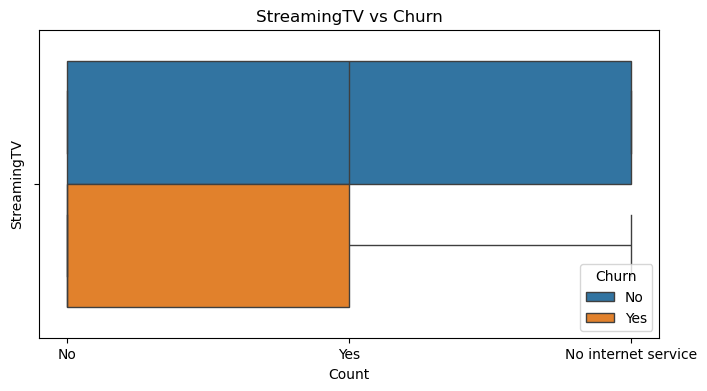

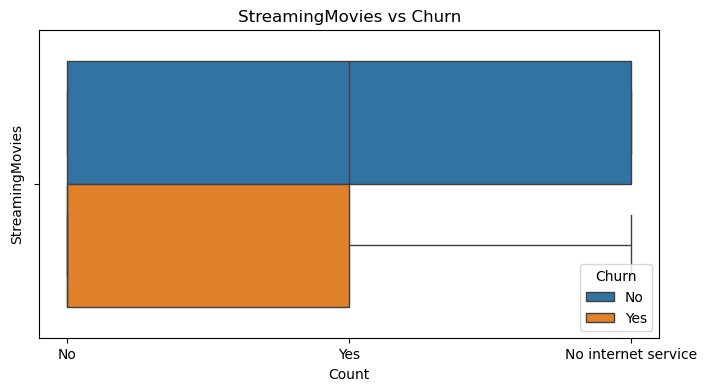

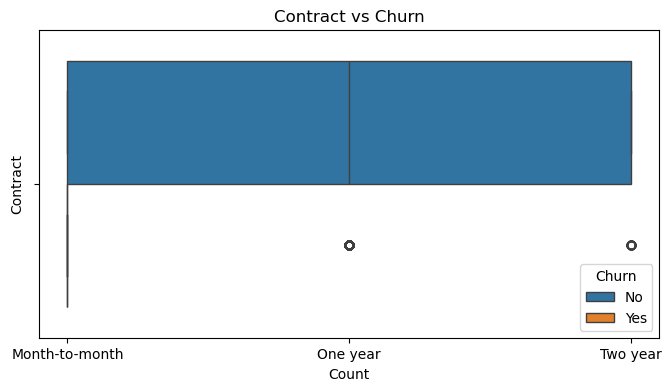

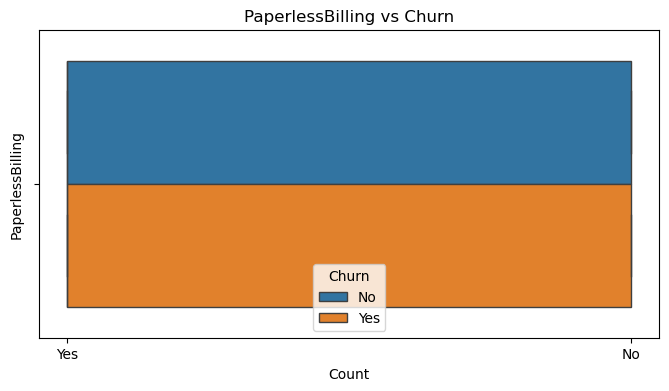

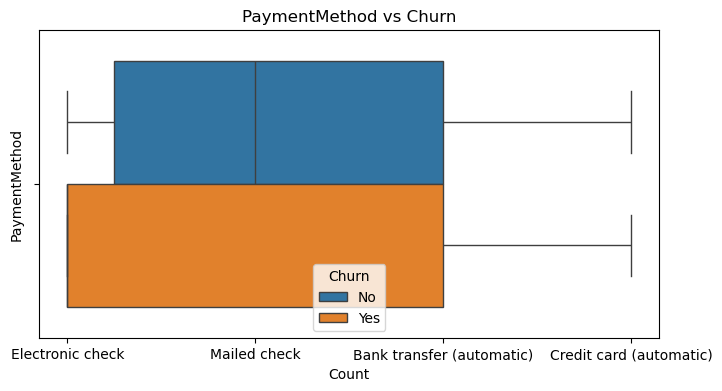

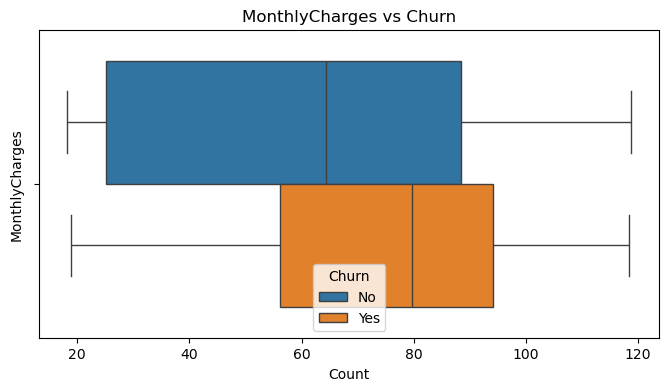

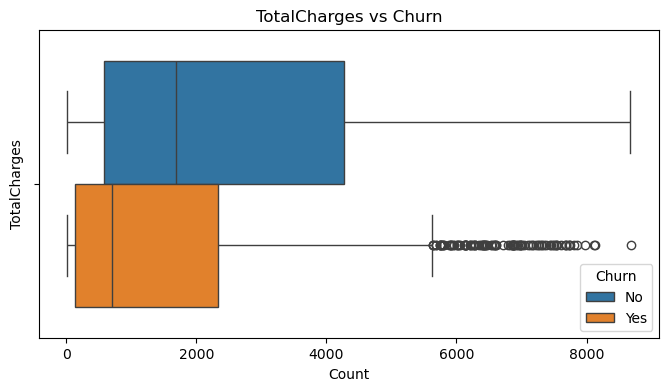

In [29]:
columns = telecom_cust.drop(columns='Churn').columns
# create histograms for Churn vs each of the columns
for column in columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=telecom_cust, x=column, hue='Churn')
    plt.title(f'{column} vs Churn')
    plt.ylabel(column)
    plt.xlabel('Count')
    plt.show()

From the boxplot for all relationship between churn and all variable. Only total charges have the high numbers of outliers. This is due to different people have different subsriptions or others reasons. So only in here is needed because obviously we want the higher charger to stay especially only churn.

**C.)** ***Demographics*** - Let us first understand the gender, age range, patner and dependent status of the customers

1. **Gender Distribution** - About half of the customers in our data set are male while the other half are female

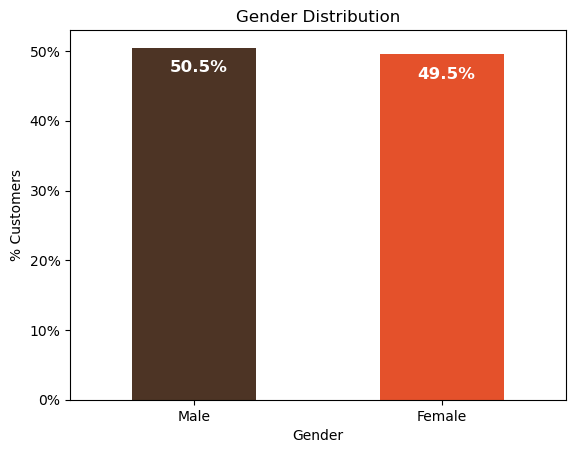

In [9]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

2. **% Senior Citizens** - There are only 16.2% of the customers who are senior citizens. Thus most of our customers in the data are younger people.


Text(0.5, 1.0, '% of Senior Citizens')

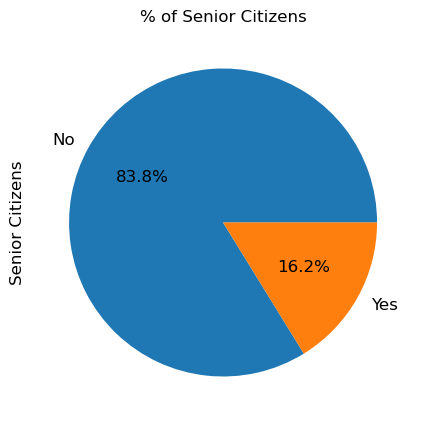

In [10]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

3. **Partner and dependent status**  - About 52% of the customers have a partner, while only 30% of the total customers have dependents. 

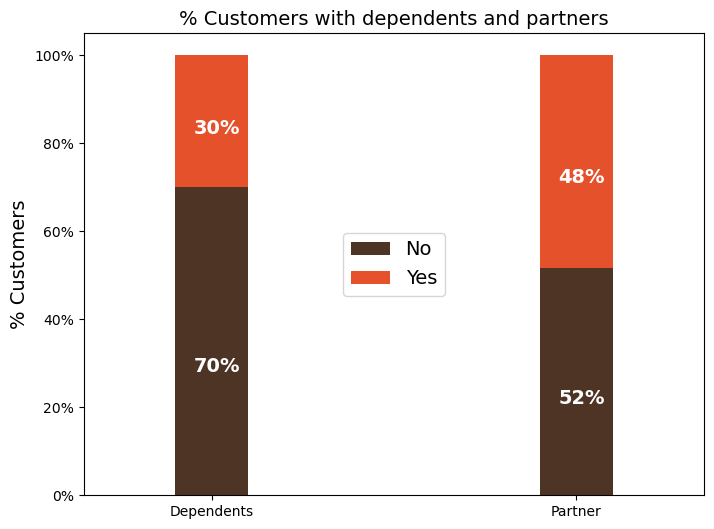

In [11]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

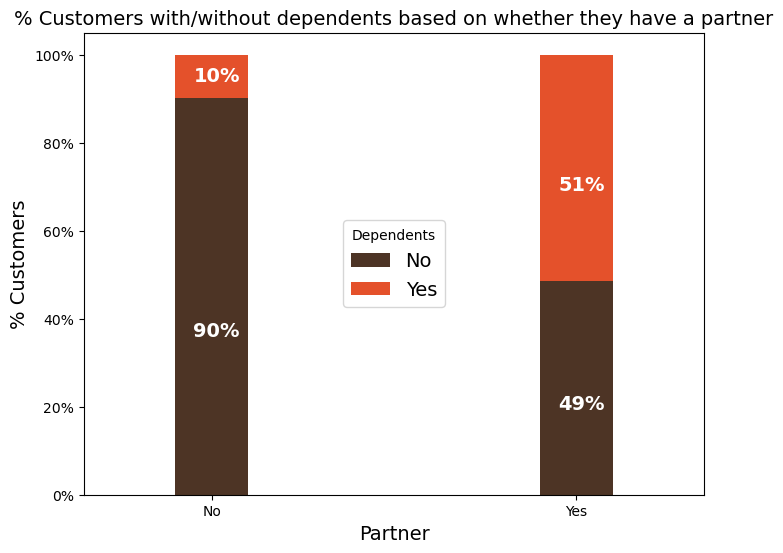

In [37]:
colors = ['#4D3425','#E4512B']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Interestingly,  among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents. 
Additionally, as expected, among the customers who do not have any partner, a majority (90%) of them do not have any dependents .

### D.) **Customer Account Information**:  Look at the tenure, contract

**1. Tenure:**  After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month or two, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

Text(0.5, 1.0, '# of Customers by their tenure')

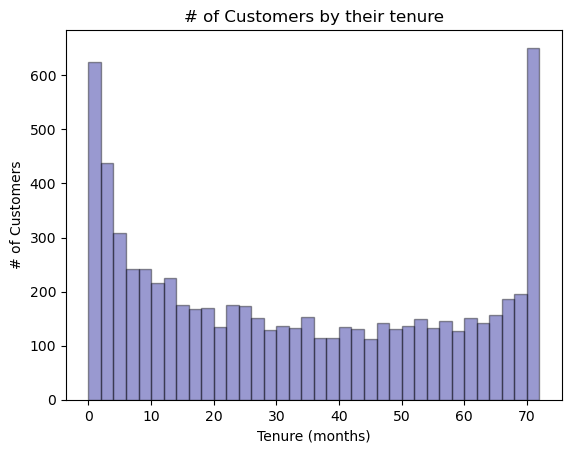

In [12]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

**2. Contracts:** To understand the above graph, lets first look at the number of customers by different contracts. 

Text(0.5, 1.0, 'Number of Customers by Contract Type')

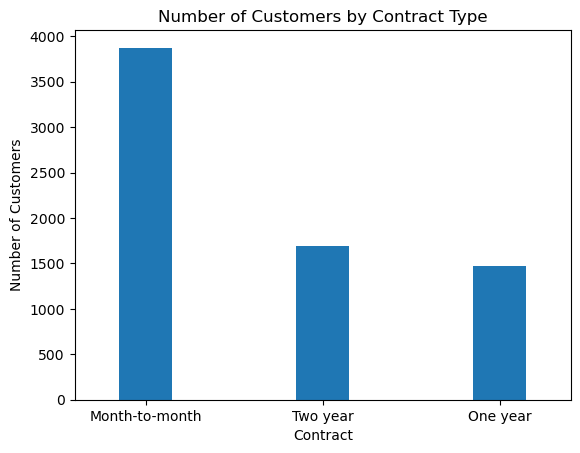

In [13]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

Below we will understand the tenure of customers based on their contract type.

Text(0.5, 1.0, 'Two Year Contract')

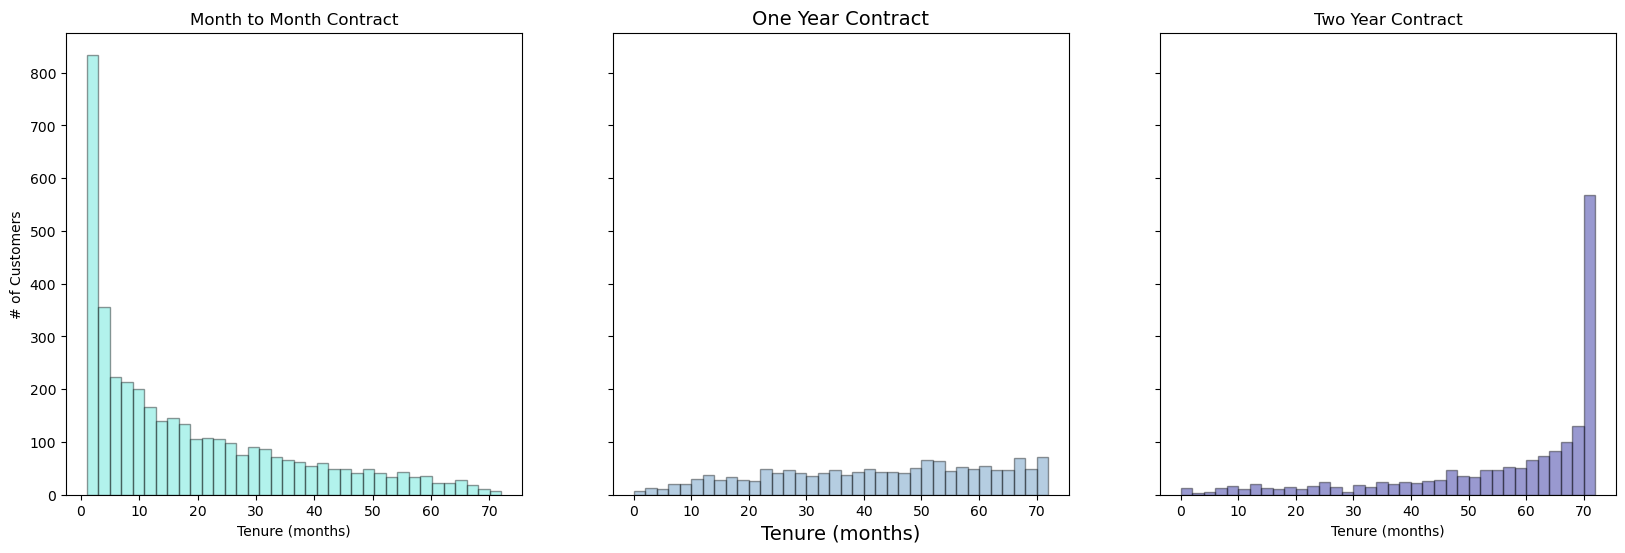

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. 

This is also what we saw in the earlier chart on correlation with the churn rate. 

### E.) **Customer Distribution**:  Let us now look at the distribution of various services used by customers

In [15]:

telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

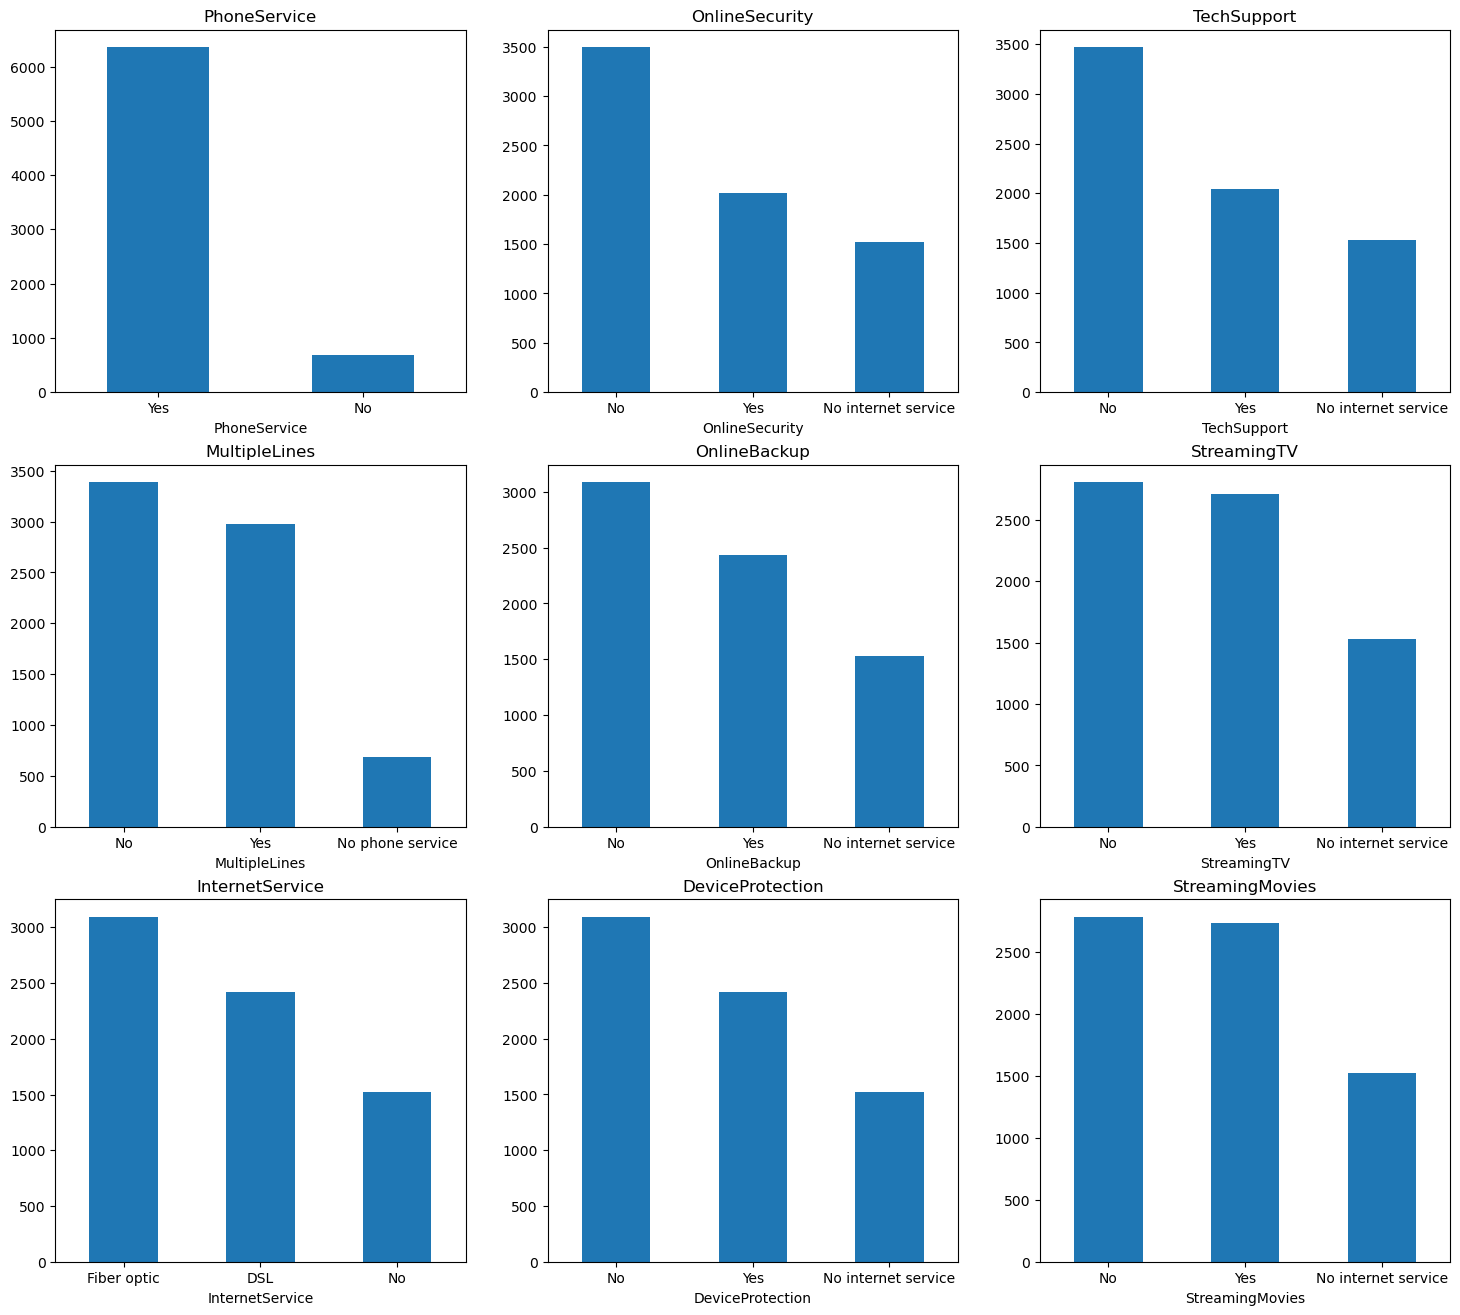

In [16]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (18,16))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

This is to get basic overview data distribution for each categorical variable in this dataset.

### F.) **Relationship**:  Look at the relation between monthly and total charges

We will observe that the total charges increases as the monthly bill for a customer increases.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

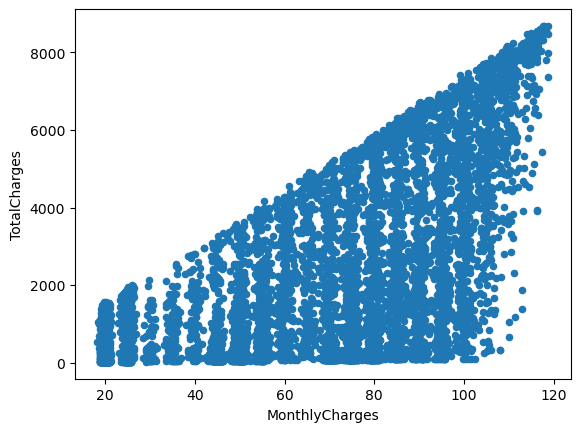

In [17]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

Total chargers increase, montlhy charges also increase and show linear relationships.

### F.) **Predictor**:  Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out

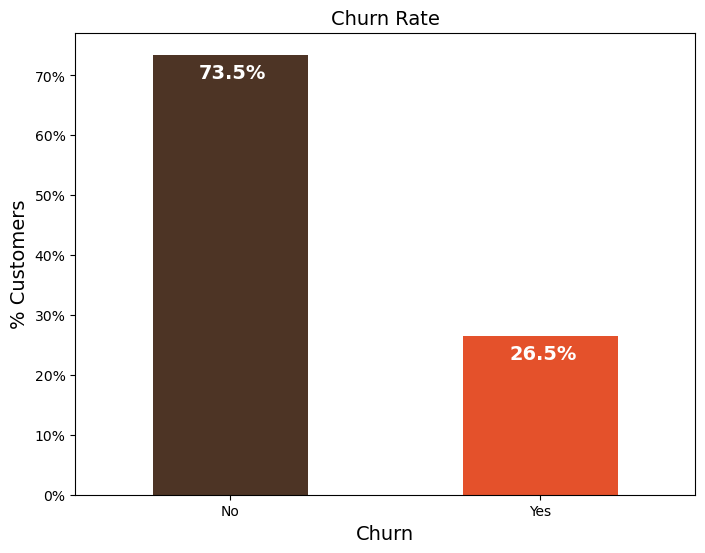

In [18]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            color='white',
            weight = 'bold',
            size = 14)

In our data, 73.5% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

**i.) Churn vs Tenure**: As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company. 

In [19]:
fig = px.box(telecom_cust, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

There are several outliers at Churn = 'Yes' with tenure 70 months and higher, which show valuable customer that we need to retain and don't want to lose. As Churn = 'No', shows majority of customer have tenure at 38 months due to contract and them really favor the telco if not them will leave. Majority customer who are churn don't even use the telco for a year. This show them really need the discount or promotion because usually telco will give discount and promotions for new customer for six months or a year. Then, customer who doesn't churn like have tenure for 72 months might be them get a discount or promotions due to their loyalty.

**ii.) Churn by Contract Type**: Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

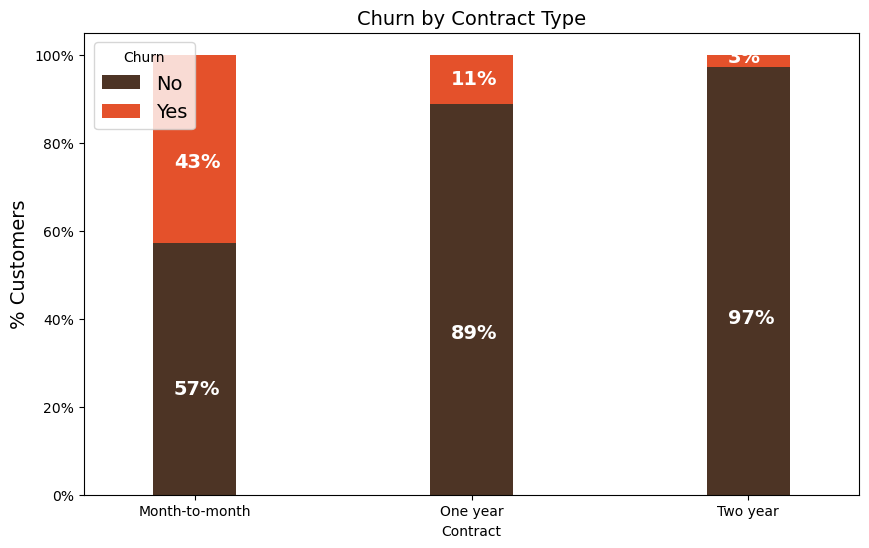

In [20]:
colors = ['#4D3425','#E4512B']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**iii.) Churn by Seniority**: Senior Citizens have almost double the churn rate than younger population.

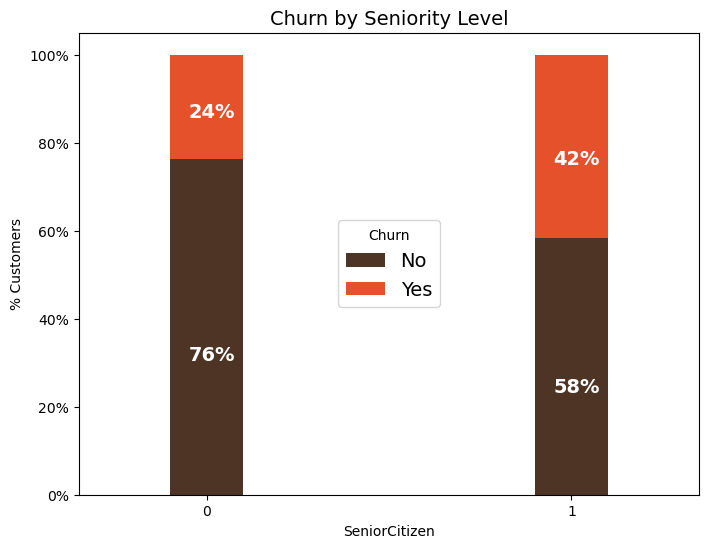

In [21]:
colors = ['#4D3425','#E4512B']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

**iv.) Churn by Monthly Charges**: Higher % of customers churn when the monthly charges are high.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

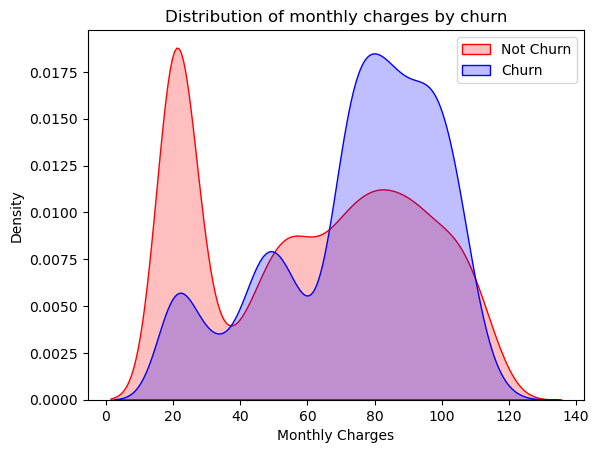

In [22]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

**v.) Churn by Total Charges**: It seems that there is higer churn when the total charges are lower.

Text(0.5, 1.0, 'Distribution of total charges by churn')

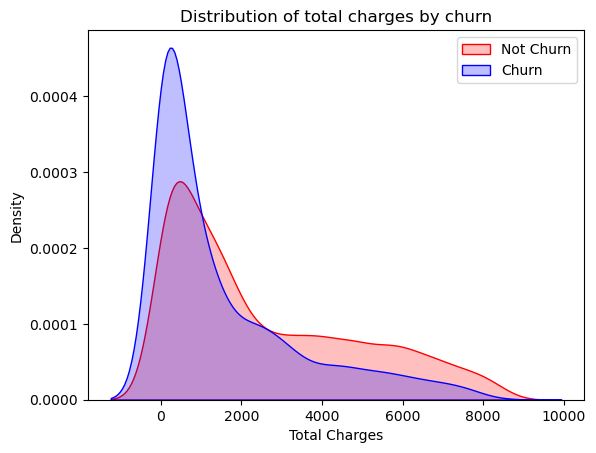

In [23]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

# Model Implementation

We will develop Logistic Regression, Random Forest and Decision Tree

### One model only (Logistic Regression)

In [48]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import (
    VectorAssembler, StandardScaler, PCA,
    StringIndexer, OneHotEncoder, IndexToString
)
from pyspark.ml.classification import DecisionTreeClassifier, LogisticRegression, RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Step 1: Start Spark session
spark = SparkSession.builder.appName("MixedDataClassification").getOrCreate()

# Step 2: Load dataset
df = spark.read.csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", header=True, inferSchema=True)
df.printSchema()
df.show(5)

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)

+----------+------+-------------+-------+----------+------+------------+---------

In [49]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



We know we have 11 missing values from above at TotalCharges, so here with impute it with mean.

In [50]:
# To check missing value in the dataset
from pyspark.sql.functions import mean

mean_id = df.select(mean("TotalCharges")).collect()[0][0]
df = df.fillna({"TotalCharges": mean_id})

In [51]:
# Step 3: Clean TotalCharges
from pyspark.sql.functions import col, trim, when

df = df.withColumn("TotalCharges", when(trim(col("TotalCharges")) == "", None).otherwise(col("TotalCharges")))
df = df.na.drop(subset=["TotalCharges"])
df = df.withColumn("TotalCharges", col("TotalCharges").cast("double"))


In [52]:
df.filter(df["Churn"].isNull()).show()


+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-

No more missing values inside the dataset.

In [53]:
# Step 3: Drop ID column (Not necessary here for modelling)
df = df.drop("customerID")

In [54]:
# Step 4: Define categorical and numerical features
categorical_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod"
]
numeric_cols = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

In [55]:
# Step 5: Index and encode categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col+"_index", outputCol=col+"_ohe") for col in categorical_cols]

In [56]:
# Step 6: Label indexer
label_indexer = StringIndexer(inputCol="Churn", outputCol="label")

In [57]:
# Step 7: Assemble features
assembler_inputs = [col+"_ohe" for col in categorical_cols] + numeric_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features_raw")

In [58]:
# Scale and apply PCA
scaler = StandardScaler(inputCol="features_raw", outputCol="features_scaled", withMean=True, withStd=True)
pca = PCA(k=3, inputCol="features_scaled", outputCol="features_pca")

### Logistic Regression

In [26]:
# Step 8: Classifier
lr = LogisticRegression(labelCol="label", featuresCol="features_pca", maxIter=100)

In [27]:
# Step 9: Pipeline
pipeline = Pipeline(stages=indexers + encoders + [label_indexer, assembler, scaler, pca, lr])


In [28]:
# Step 10: Hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1]) \
    .addGrid(lr.elasticNetParam, [0.1, 0.5, 1]) \
    .build()

evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")

cv = CrossValidator(estimator=pipeline,
                    estimatorParamMaps=param_grid,
                    evaluator=evaluator,
                    numFolds=5)

In [29]:
# Step 11: Train-test split
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

In [30]:
# Step 12: Fit model
cv_model = cv.fit(train_data)
best_model = cv_model.bestModel

In [31]:
# Step 13: Make predictions on test data
predictions = best_model.transform(test_data)

# Step 14: Show predictions
predictions.select("label", "prediction", "probability").show(10, truncate=False)


+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0.0  |0.0       |[0.5507128672140742,0.4492871327859258] |
|1.0  |0.0       |[0.6141833247518486,0.38581667524815144]|
|0.0  |0.0       |[0.7362475722467403,0.2637524277532597] |
|0.0  |0.0       |[0.8290820940896589,0.17091790591034106]|
|1.0  |1.0       |[0.4906232506157179,0.5093767493842821] |
|0.0  |0.0       |[0.6022780134543096,0.39772198654569035]|
|0.0  |0.0       |[0.5243365950702428,0.4756634049297572] |
|1.0  |0.0       |[0.5554845246974826,0.44451547530251745]|
|0.0  |0.0       |[0.5888979299619721,0.4111020700380279] |
|1.0  |0.0       |[0.5881623793982845,0.41183762060171547]|
+-----+----------+----------------------------------------+
only showing top 10 rows



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [33]:
# Extract true labels and predicted probabilities for class 1
results = predictions.select("label", "probability").collect()

# Get y_true and y_score
y_true = [int(row['label']) for row in results]
y_scores = [float(row['probability'][1]) for row in results]  # class 1 probability


In [34]:
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)


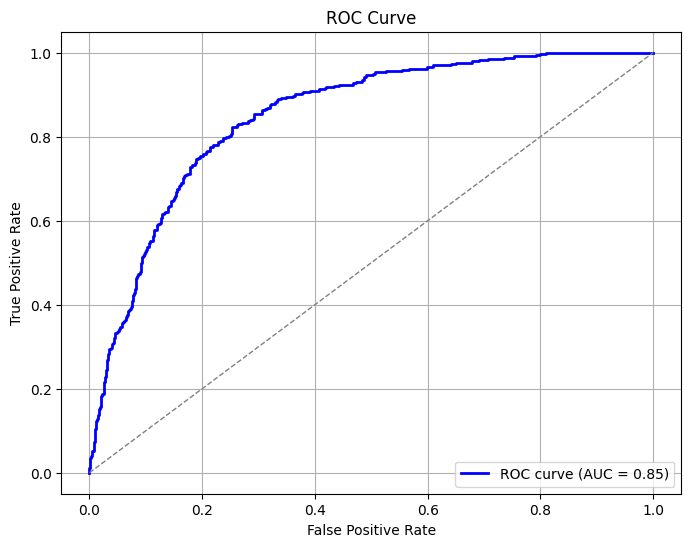

In [35]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [37]:
# Evaluate on test data
predictions = best_model.transform(test_data)

accuracy = evaluator.evaluate(predictions)
print("Test Accuracy :")
print(accuracy)

roc_df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr,
    'Threshold': thresholds
})
print(roc_df.head())


Test Accuracy :
0.8502642584275258
   False Positive Rate  True Positive Rate  Threshold
0             0.000000            0.000000        inf
1             0.000000            0.002915   0.766882
2             0.000000            0.011662   0.751353
3             0.001001            0.011662   0.749410
4             0.001001            0.034985   0.727964


### Decision Tree

+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0.0  |0.0       |[0.6617647058823529,0.3382352941176471] |
|1.0  |0.0       |[0.6617647058823529,0.3382352941176471] |
|0.0  |0.0       |[0.6617647058823529,0.3382352941176471] |
|0.0  |0.0       |[0.9474221541602859,0.05257784583971414]|
|1.0  |1.0       |[0.36548223350253806,0.6345177664974619]|
|0.0  |0.0       |[0.6617647058823529,0.3382352941176471] |
|0.0  |0.0       |[0.6617647058823529,0.3382352941176471] |
|1.0  |0.0       |[0.6617647058823529,0.3382352941176471] |
|0.0  |0.0       |[0.6617647058823529,0.3382352941176471] |
|1.0  |0.0       |[0.6617647058823529,0.3382352941176471] |
+-----+----------+----------------------------------------+
only showing top 10 rows



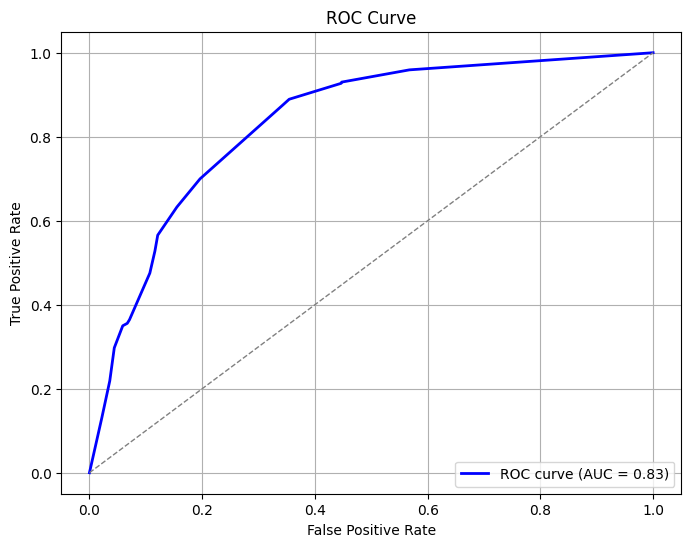

Test Accuracy :
0.5704261112424378
   False Positive Rate  True Positive Rate  Threshold
0             0.000000            0.000000        inf
1             0.022022            0.131195   0.730650
2             0.036036            0.218659   0.665306
3             0.044044            0.297376   0.647482
4             0.059059            0.349854   0.634518


In [60]:
# Step 8: Classifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features_pca")

# Step 9: Pipeline
pipeline = Pipeline(stages=indexers + encoders + [label_indexer, assembler, scaler, pca, dt])

# Step 10: Hyperparameter tuning
param_grid = ParamGridBuilder().addGrid(dt.maxDepth, [5, 10]).build()

evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")

cv = CrossValidator(estimator=pipeline,
                    estimatorParamMaps=param_grid,
                    evaluator=evaluator,
                    numFolds=5)

# Step 11: Train-test split
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Step 12: Fit model
cv_model = cv.fit(train_data)
best_model = cv_model.bestModel

# Step 13: Make predictions on test data
predictions = best_model.transform(test_data)

# Step 14: Show predictions
predictions.select("label", "prediction", "probability").show(10, truncate=False)

# Extract true labels and predicted probabilities for class 1
results = predictions.select("label", "probability").collect()

# Get y_true and y_score
y_true = [int(row['label']) for row in results]
y_scores = [float(row['probability'][1]) for row in results]  # class 1 probability

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Evaluate on test data
predictions = best_model.transform(test_data)

accuracy = evaluator.evaluate(predictions)
print("Test Accuracy :")
print(accuracy)

roc_df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr,
    'Threshold': thresholds
})
print(roc_df.head())


### Random Forest

+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0.0  |0.0       |[0.5480766591715663,0.4519233408284338] |
|1.0  |0.0       |[0.6623838414581529,0.337616158541847]  |
|0.0  |0.0       |[0.6892789984503958,0.3107210015496042] |
|0.0  |0.0       |[0.819077804335904,0.18092219566409604] |
|1.0  |1.0       |[0.37669414413861013,0.6233058558613898]|
|0.0  |0.0       |[0.6789941640184665,0.3210058359815335] |
|0.0  |0.0       |[0.6005599453530759,0.3994400546469241] |
|1.0  |0.0       |[0.6472237158312905,0.35277628416870954]|
|0.0  |0.0       |[0.5758853110745518,0.42411468892544824]|
|1.0  |0.0       |[0.5758853110745518,0.42411468892544824]|
+-----+----------+----------------------------------------+
only showing top 10 rows



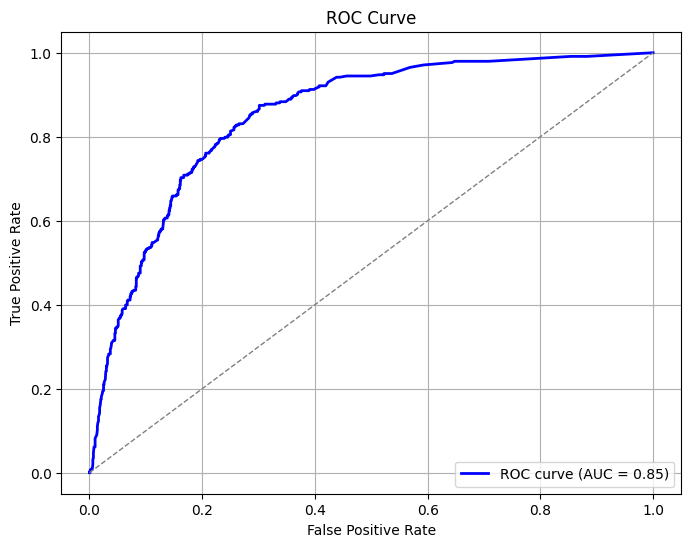

Test Accuracy :
0.8498907070335644
   False Positive Rate  True Positive Rate  Threshold
0             0.000000            0.000000        inf
1             0.001001            0.000000   0.732469
2             0.001001            0.005831   0.728615
3             0.003003            0.008746   0.728539
4             0.005005            0.008746   0.723676


In [61]:
# Step 8: Classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features_pca")

# Step 9: Pipeline
pipeline = Pipeline(stages=indexers + encoders + [label_indexer, assembler, scaler, pca, rf])

# Step 10: Hyperparameter tuning
param_grid = ParamGridBuilder().addGrid(rf.numTrees, [10, 20]).addGrid(rf.maxDepth, [5, 10]).build()

evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")

cv = CrossValidator(estimator=pipeline,
                    estimatorParamMaps=param_grid,
                    evaluator=evaluator,
                    numFolds=5)

# Step 11: Train-test split
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Step 12: Fit model
cv_model = cv.fit(train_data)
best_model = cv_model.bestModel

# Step 13: Make predictions on test data
predictions = best_model.transform(test_data)

# Step 14: Show predictions
predictions.select("label", "prediction", "probability").show(10, truncate=False)

# Extract true labels and predicted probabilities for class 1
results = predictions.select("label", "probability").collect()

# Get y_true and y_score
y_true = [int(row['label']) for row in results]
y_scores = [float(row['probability'][1]) for row in results]  # class 1 probability

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Evaluate on test data
predictions = best_model.transform(test_data)

accuracy = evaluator.evaluate(predictions)
print("Test Accuracy :")
print(accuracy)

roc_df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr,
    'Threshold': thresholds
})
print(roc_df.head())


Accuracy is overall percentage of correct predictions. Here we try on 3 classifcation methods which are Decision Tree, Random Forest and Logistic Regression. At here, logistic regression has the highest accuracy among all at 0.85 and closely followed by decision tree at 0.84. The lowest accuracy here is decision tree with 0.57. This show moslt likely half of the predictions is wrong. 

Precision is fraction of predicted psotive that are correct where we can calculate use True Positive / (True Positive + False Negative) 

F1 score is harmonic mean of precision and recall. 

### Full code to compare with others classfications method and to find best model using ROC AUC

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml.classification import DecisionTreeClassifier, LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# --- Step 1: Prepare label ---
label_indexer = StringIndexer(inputCol="Churn", outputCol="label")

# --- Step 2: Categorical encoding ---
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

indexers = [StringIndexer(inputCol=col, outputCol=col + "_idx", handleInvalid='keep') for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_idx", outputCol=col + "_ohe") for col in categorical_cols]

# --- Step 3: Numerical features ---
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
assembler_inputs = [col + "_ohe" for col in categorical_cols] + numeric_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features_raw")
scaler = StandardScaler(inputCol="features_raw", outputCol="features", withMean=True, withStd=True)

# --- Step 4: Classifiers ---
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
rf = RandomForestClassifier(labelCol="label", featuresCol="features")
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=100)

# --- Step 5: Param grids ---
dt_param_grid = ParamGridBuilder().addGrid(dt.maxDepth, [5, 10]).build()
rf_param_grid = ParamGridBuilder().addGrid(rf.numTrees, [10, 20]).addGrid(rf.maxDepth, [5, 10]).build()
lr_param_grid = ParamGridBuilder().addGrid(lr.regParam, [0.01, 0.1]).addGrid(lr.elasticNetParam, [0.0, 0.5]).build()

# --- Step 6: Evaluator ---
evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")

# --- Step 7: CrossValidator setup for each model ---
def build_pipeline_and_cv(classifier, param_grid):
    pipeline = Pipeline(stages=indexers + encoders + [label_indexer, assembler, scaler, classifier])
    cv = CrossValidator(estimator=pipeline,
                        estimatorParamMaps=param_grid,
                        evaluator=evaluator,
                        numFolds=5,
                        parallelism=2)
    return cv

cv_dt = build_pipeline_and_cv(dt, dt_param_grid)
cv_rf = build_pipeline_and_cv(rf, rf_param_grid)
cv_lr = build_pipeline_and_cv(lr, lr_param_grid)

# --- Step 8: Train/test split ---
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# --- Step 9: Fit models ---
cv_model_dt = cv_dt.fit(train_data)
cv_model_rf = cv_rf.fit(train_data)
cv_model_lr = cv_lr.fit(train_data)

# --- Step 10: Evaluate on test set ---
auc_dt = evaluator.evaluate(cv_model_dt.bestModel.transform(test_data))
auc_rf = evaluator.evaluate(cv_model_rf.bestModel.transform(test_data))
auc_lr = evaluator.evaluate(cv_model_lr.bestModel.transform(test_data))

# --- Step 11: Print results ---
print("Decision Tree AUC:", auc_dt)
print("Random Forest AUC:", auc_rf)
print("Logistic Regression AUC:", auc_lr)

# --- Step 12: Choose best model ---
models = {'Decision Tree': auc_dt, 'Random Forest': auc_rf, 'Logistic Regression': auc_lr}
best_model_name = max(models, key=models.get)
print("Best model is:", best_model_name)




Decision Tree AUC: 0.6985615352962292
Random Forest AUC: 0.8462121013141429
Logistic Regression AUC: 0.8556617842332124
Best model is: Logistic Regression


In [45]:
# Evaluate on test data
predictions = best_model.transform(test_data)

accuracy = evaluator.evaluate(predictions)
print("Test Accuracy :")
print(accuracy)

Test Accuracy :
0.8502642584275258


Three model used which are decision tree, random forest and logistic regression. Logistic regression has the highest area under the curve whihc is show the best model. ROC AUC is used to measures ranking ability independent of a decision threshold. Thee threshold here is auto. The highest AUC here is 0.86 which shows a good class separation and the lowes is 0.70 which show fair class separation.

In [40]:
from pyspark.ml.classification import LogisticRegressionModel

# Extract the best logistic regression model
best_lr_model = cv_model_lr.bestModel.stages[-1]  # Last stage is the classifier

# Print best hyperparameters
if isinstance(best_lr_model, LogisticRegressionModel):
    print("\nBest Logistic Regression Hyperparameters:")
    print(" - regParam:", best_lr_model.getRegParam())
    print(" - elasticNetParam:", best_lr_model.getElasticNetParam())
    print(" - maxIter:", best_lr_model.getMaxIter())



Best Logistic Regression Hyperparameters:
 - regParam: 0.01
 - elasticNetParam: 0.5
 - maxIter: 100


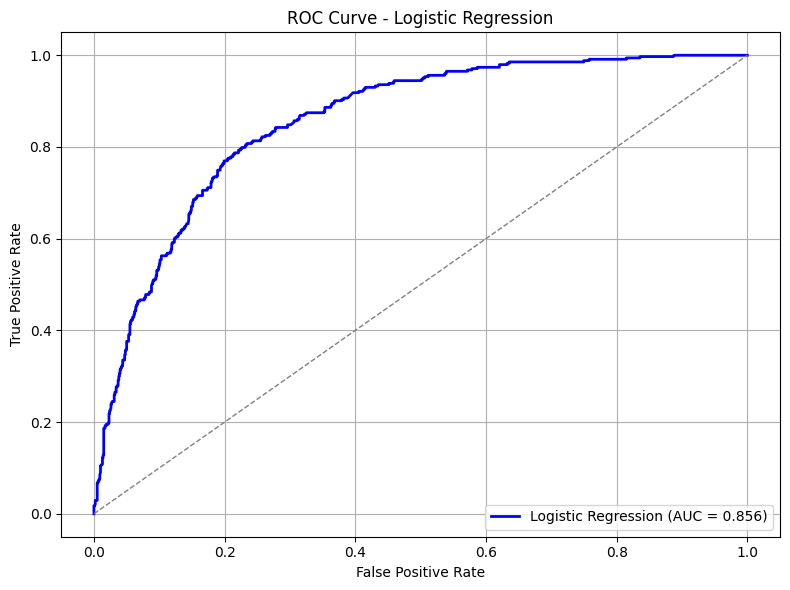

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# --- Step 1: Choose best model object ---
model_dict = {
    "Decision Tree": cv_model_dt,
    "Random Forest": cv_model_rf,
    "Logistic Regression": cv_model_lr
}

# Use the name from previous best_model_name step
best_model_cv = model_dict[best_model_name]

# --- Step 2: Extract ROC data ---
predictions = best_model_cv.bestModel.transform(test_data)
results = predictions.select("label", "probability").collect()
y_true = [row['label'] for row in results]
y_scores = [row['probability'][1] for row in results]

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# --- Step 3: Plot ---
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'{best_model_name} (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


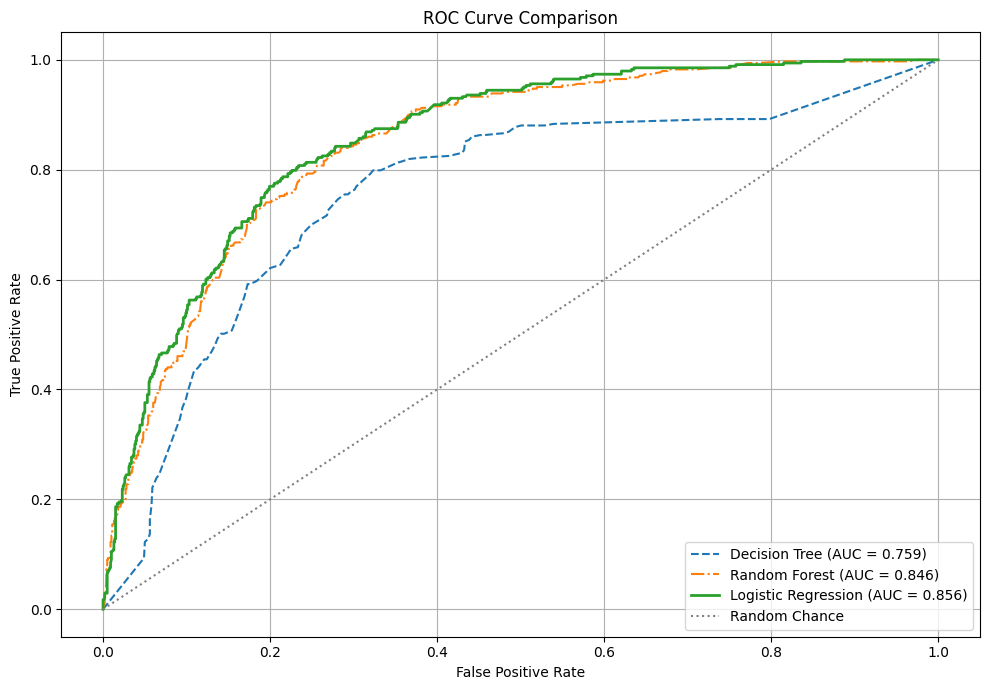

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to extract true labels and probabilities
def extract_roc_data(model, data, label_col="label"):
    predictions = model.transform(data)
    preds = predictions.select(label_col, "probability").collect()
    y_true = [row[label_col] for row in preds]
    y_scores = [row["probability"][1] for row in preds]  # probability of class 1
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# --- Extract ROC data for each model ---
fpr_dt, tpr_dt, auc_dt_plot = extract_roc_data(cv_model_dt.bestModel, test_data)
fpr_rf, tpr_rf, auc_rf_plot = extract_roc_data(cv_model_rf.bestModel, test_data)
fpr_lr, tpr_lr, auc_lr_plot = extract_roc_data(cv_model_lr.bestModel, test_data)

# --- Plot ---
plt.figure(figsize=(10, 7))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt_plot:.3f})", linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf_plot:.3f})", linestyle='-.')
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr_plot:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle=':', label='Random Chance')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


From the ROC curve graph can see that logistic regression and random forest likely have the same performance. This also show when we find the accuracy. 

In [44]:
roc_dt = pd.DataFrame({
    'False Positive Rate': fpr_dt,
    'True Positive Rate': tpr_dt,
    'Threshold': auc_dt_plot
})
print(roc_dt.head())

roc_rf = pd.DataFrame({
    'False Positive Rate': fpr_rf,
    'True Positive Rate': tpr_rf,
    'Threshold': auc_rf_plot
})
print(roc_rf.head())

roc_lr = pd.DataFrame({
    'False Positive Rate': fpr_lr,
    'True Positive Rate': tpr_lr,
    'Threshold': auc_lr_plot
})
print(roc_lr.head())


   False Positive Rate  True Positive Rate  Threshold
0             0.000000            0.000000   0.758528
1             0.049049            0.093294   0.758528
2             0.050050            0.122449   0.758528
3             0.054054            0.128280   0.758528
4             0.056056            0.137026   0.758528
   False Positive Rate  True Positive Rate  Threshold
0             0.000000            0.000000   0.846212
1             0.002002            0.011662   0.846212
2             0.002002            0.017493   0.846212
3             0.003003            0.029155   0.846212
4             0.004004            0.055394   0.846212
   False Positive Rate  True Positive Rate  Threshold
0             0.000000            0.000000   0.855662
1             0.000000            0.002915   0.855662
2             0.000000            0.017493   0.855662
3             0.001001            0.017493   0.855662
4             0.002002            0.020408   0.855662


Recall or Sensitiviy or True Positive Rate (TPR) is use when false negative are expensive, disease detection, churn retention and missed fraud. 

Every customer get a churn probability. Threshold is the cut-off that turns that probability into a label Churn = 0 is stay and Churn = 1 is leave. 

| Threshold | Labeled Churn | Recall (catch rate) | False Positives |
| --------- | ------------- | ------------------- | --------------- |
| 0.50      | few           | moderate            | low             |
| 0.40      | more          | higher              | more            |
| 0.30      | many          | very high           | lots            |

If recall is rises, it shows miss fewer real churners or lower False Negative (FN). Cost False Negative is lose a customer's lifetome value and cost of False Positive (FP) is one rentention SMS or small discount. If losing a customer is 20 times more expensive than an unnecesary offer, we would rather risk extra offer (FP) than let a chruner slip away (FN). So lower the threshold untul the expected total cost stops dropping. This also one method to find good model depends on objectives.